# Comparación de más de dos medias
# Vamos a comprarar los datos de ventas dependiendo de las estaciones

Importamos librerias

In [ ]:
from google.colab import drive # For linking colab to Google Drive
import pandas as pd # Datasets
import numpy as np # Vectores, matrices
import matplotlib.pyplot as plt # Hacer gráficos
import scipy.stats as stats # Estadística
import seaborn as sns # Gráficos
from pandas.api.types import CategoricalDtype # Para variables ordinales

Montamos nuestro Google Drive como una unidad para cargar y guardar archivos

In [ ]:
drive.mount('mydrive')

Mounted at mydrive


Cargamos el archivo con los datos de nuestro Google Drive y lo vemos

In [ ]:
path = r'/content/mydrive/Othercomputers/portatil/Master/AnalisisDatos/Ejercicio_12nov_2/WBR_11_12_denormalized_temp.csv'
wbr= pd.read_csv(path, sep = ';', decimal = ',')
wbr 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp_celsius,windspeed_kh,atemp,hum,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.110847,10.749882,0.363625,80.5833,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.902598,16.652113,0.353739,69.6087,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.050924,16.636703,0.189405,43.7273,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.200000,10.739832,0.212122,59.0435,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.305237,12.522300,0.229270,43.6957,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2012,1,1,12,0,4,1,2,10.420847,23.458911,0.226642,65.2917,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,10.386653,10.416557,0.255046,59.0000,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,10.386653,8.333661,0.242400,75.2917,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,10.489153,23.500518,0.231700,48.3333,364,1432,1796


La columna con las estaciones está codificada con números, vamos a hacer una nueva pero usando texto

In [ ]:
wbr.loc[(wbr['season'] == 1), 'season_cat'] = 'Winter'
wbr.loc[(wbr['season'] == 2), 'season_cat'] = 'Spring'
wbr.loc[(wbr['season'] == 3), 'season_cat'] = 'Summer'
wbr.loc[(wbr['season'] == 4), 'season_cat'] = 'Autumn'

Comprobamos que se ha hecho bien el cambio

In [ ]:
pd.crosstab(wbr.season, wbr.season_cat)

season_cat,Autumn,Spring,Summer,Winter
season,,,,
1,0,0,0,181
2,0,184,0,0
3,0,0,188,0
4,178,0,0,0


A partir de esta columna creamos otra pero conviertiendo sus datos en ordinales.
De esta manera, al hacer un gráfico se hará con el orden que marquemos

In [ ]:
# Primero definimos la lista y orden de las categorias
my_categories = ['Spring', 'Summer', 'Autumn', 'Winter']
# Definimos el tipo de dato con la lista de categorias diciendole que están en orden
season_type = CategoricalDtype(categories = my_categories, ordered = True)
# Creamos una nueva columna del tiempo pero con variables de tipo ordinal
wbr['season_cat_ord'] = wbr.season_cat.astype(season_type)

Dibujamos que porcentaje de días hay para cada estación

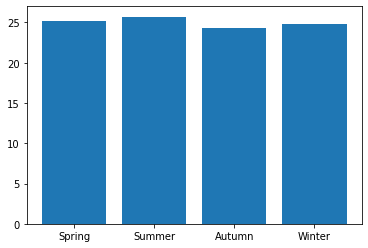

In [ ]:
mytable = pd.crosstab(index = wbr["season_cat_ord"], columns="count")
n=mytable.sum()
mytable2 = (mytable/n)*100
plt.bar(mytable2.index, mytable2['count'])
plt.show()

In [ ]:
Agrupamos los datos de venta por estación

In [ ]:
cnt_spring = wbr.loc[wbr.season_cat_ord == 'Spring', 'cnt']
cnt_summer = wbr.loc[wbr.season_cat_ord == 'Summer', 'cnt']
cnt_autumn = wbr.loc[wbr.season_cat_ord == 'Autumn', 'cnt']
cnt_winter = wbr.loc[wbr.season_cat_ord == 'Winter', 'cnt']

Hacemos un test anova para las medias de los datos por estación.
Primero obtenemos el valor t

In [ ]:
stats.f_oneway(cnt_spring, cnt_summer, cnt_autumn, cnt_winter)[0]

128.76962156570784

Ahora obtenemos el p value

In [ ]:
stats.f_oneway(cnt_spring, cnt_summer, cnt_autumn, cnt_winter)[1]

6.720391362913176e-67

El pvalue siendo menos que 0.05 nos hace rechazar la hipotesis nula de que todas las medias son iguales. Hay por tanto diferencia de medias entre todas las medias o en una media con las otras

Vemos la media de todas las estaciones

In [ ]:
wbr.groupby('season_cat_ord').cnt.mean()

season_cat_ord
Spring    4992.331522
Summer    5644.303191
Autumn    4728.162921
Winter    2604.132597
Name: cnt, dtype: float64

Vemos la media total para usarla en el gráfico

In [ ]:
wbr.cnt.mean()

4504.3488372093025

Vemos ahora también para el gráfico el total de casos

In [ ]:
wbr.cnt.count()

731

Ahora dibujamos un gráfico con las medias e intervalos de confianza para cada estación. 

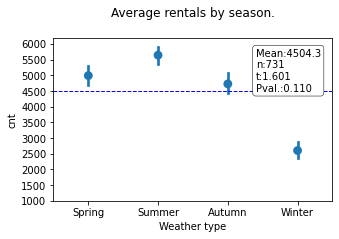

In [ ]:
# Elegimos el tamaño del gráfico
plt.figure(figsize=(5,3))
# Creamos el gráfico
ax = sns.pointplot(x="season_cat_ord", y="cnt", data=wbr,ci=99, join=0)
# Vamos a poner cuando poner los ticks del eje y y el rango de este
plt.yticks(np.arange(1000, 7000, step=500))
plt.ylim(1000,6200)
# Ponemos una línea horizontal en la media total
plt.axhline(y=wbr.cnt.mean(), linewidth=1, linestyle= 'dashed', color="blue")
# Vamos a añadir un cuadro con algunos datos: Ponemos la media total, el numero de datos, el pvalue y el valor de t que es otro dato de interés
props = dict(boxstyle = 'round', facecolor= 'white', lw=0.5)
plt.text(2.4,4500,'Mean:4504.3''\n''n:731' '\n' 't:1.601' '\n' 'Pval.:0.110', bbox=props)
# Nombre del eje x
plt.xlabel('Weather type')
# Título del gráfico
plt.title('Average rentals by season.''\n')
plt.show()